In [1]:
import pandas as pd
import numpy as np
import warnings
import requests 
from operator import itemgetter
import random
from random import seed
from random import randint
warnings.filterwarnings("ignore")
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras.layers import Activation, Dense, Dropout

In [2]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [3]:
bat=pd.read_csv('~/Desktop/IPL/bat.csv')
ball=pd.read_csv('~/Desktop/IPL/ball.csv')
match=pd.read_csv('~/Desktop/IPL/match.csv')
squad=pd.read_csv('~/Desktop/IPL/squad.csv')
squad=pd.merge(squad,match[['matchtype','start_date','series_id','match_id']],on='match_id', how='left')
squad=squad.drop_duplicates()
pd.set_option('display.max_columns', None)

In [4]:
bat[(bat.player_id==19) & (bat.start_date>'2017-12-22 18:30:00+00:00')].describe()

In [23]:
bat[bat.series_id==232 ].head(25)

,Unnamed: 0,name_x,playing_role,id,order,runs_x,balls,strike_rate,fours,sixes,how_out,fall_of_wicket,fall_of_wicket_over,player_id,scorecard_id,match_number,name_y,start_date,matchtype,series_id,match_detail_id,title,runs_y,over,run_rate,match_id,opp_team_id,team_id
50519,20341,Saurabh Tiwary,BAT,20298,3,42,31,135.48,3,1,c du Plessis b Jadeja,NaN,14.1,387,2350,1.0,Mumbai Indians v Chennai Super Kings,2020-09-19 12:30:00+00:00,t20,232,2354,Mumbai Indians Innings,162,20.0,8.10,1065,20,21
50520,20340,Suryakumar Yadav,BAT,20297,2,17,16,106.25,2,0,c Curran b Chahar,NaN,10.6,987,2350,1.0,Mumbai Indians v Chennai Super Kings,2020-09-19 12:30:00+00:00,t20,232,2354,Mumbai Indians Innings,162,20.0,8.10,1065,20,21
50521,20345,James Pattinson,BOWL,20302,7,11,8,137.50,2,0,c du Plessis b Ngidi,NaN,18.5,75,2350,1.0,Mumbai Indians v Chennai Super Kings,2020-09-19 12:30:00+00:00,t20,232,2354,Mumbai Indians Innings,162,20.0,8.10,1065,20,21
50522,20343,Kieron Pollard,AR,20300,5,18,14,128.57,1,1,c &dagger;Dhoni b Ngidi,NaN,18.1,423,2350,1.0,Mumbai Indians v Chennai Super Kings,2020-09-19 12:30:00+00:00,t20,232,2354,Mumbai Indians Innings,162,20.0,8.10,1065,20,21
50523,20344,Krunal Pandya,AR,20301,6,3,3,100.00,0,0,c &dagger;Dhoni b Ngidi,NaN,16.1,674,2350,1.0,Mumbai Indians v Chennai Super Kings,2020-09-19 12:30:00+00:00,t20,232,2354,Mumbai Indians Innings,162,20.0,8.10,1065,20,21
50524,20346,Rahul Chahar,BOWL,20303,8,2,4,50.00,0,0,not out,NaN,0.0,677,2350,1.0,Mumbai Indians v Chennai Super Kings,2020-09-19 12:30:00+00:00,t20,232,2354,Mumbai Indians Innings,162,20.0,8.10,1065,20,21
50525,20347,Trent Boult,BOWL,20304,9,0,1,0.00,0,0,b Chahar,NaN,19.1,93,2350,1.0,Mumbai Indians v Chennai Super Kings,2020-09-19 12:30:00+00:00,t20,232,2354,Mumbai Indians Innings,162,20.0,8.10,1065,20,21
50526,20348,Jasprit Bumrah,BOWL,20305,10,5,3,166.66,0,0,not out,NaN,0.0,22,2350,1.0,Mumbai Indians v Chennai Super Kings,2020-09-19 12:30:00+00:00,t20,232,2354,Mumbai Indians Innings,162,20.0,8.10,1065,20,21
50527,20349,Murali Vijay,BAT,20306,0,1,7,14.28,0,0,lbw b Pattinson,NaN,1.6,47,2351,1.0,Mumbai Indians v Chennai Super Kings,2020-09-19 12:30:00+00:00,t20,232,2354,Chennai Super Kings Innings,166,19.2,8.58,1065,21,20
50528,20350,Shane Watson,AR,20307,1,4,5,80.00,1,0,lbw b Boult,NaN,0.6,115,2351,1.0,Mumbai Indians v Chennai Super Kings,2020-09-19 12:30:00+00:00,t20,232,2354,Chennai Super Kings Innings,166,19.2,8.58,1065,21,20


In [24]:
s=pd.read_csv('~/Desktop/IPL/Finalsubmission.csv')
s.head(22)

,Id,Total Points
0,1216492_AS Yadav,28.000000
1,1216492_AT Rayudu,26.000000
2,1216492_DL Chahar,25.000000
3,1216492_F du Plessis,24.000000
4,1216492_HH Pandya,25.000000
5,1216492_JJ Bumrah,25.000000
6,1216492_JL Pattinson,-1.000000
7,1216492_KA Pollard,24.190141
8,1216492_KH Pandya,29.509091
9,1216492_L Ngidi,29.785714


In [5]:
len(bat[(bat.player_id==19) & (bat['how_out'].str.startswith('not'))])

100

In [6]:
players=squad['player_id'][squad.series_id==232].unique()
inn=[]
pid=[]
for i in players:
    match_id=1065
    #sq=squad[squad.match_id==match_id]
    #sq['Predicted Batting Points']=0
    date=match['start_date'][(match['match_id']==match_id)].iloc[0]
    mtype=match['matchtype'][(match['match_id']==match_id)].iloc[0]
    inning=squad[(squad.start_date<date) & (squad.matchtype==mtype) & (squad.player_id==i)].sort_values(by=['start_date'])
    #iplinn=squad[(squad.series_id==232) & (squad.matchtype==mtype) & (squad.player_id==player_id)].sort_values(by=['start_date'])
    inn.append(len(inning))
    pid.append(i)
    
    

Text(0, 0.5, 'Number of Players')

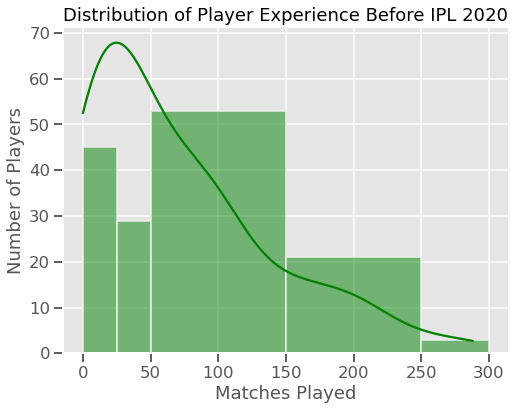

In [7]:
fig = plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.set_context('talk')
sns.color_palette("Paired")
r=sns.color_palette("rocket")
sns.histplot(inn,bins=[0,25,50,150,250,300],kde=True,color='green')
plt.title('Distribution of Player Experience Before IPL 2020')
plt.xlabel('Matches Played')
plt.ylabel('Number of Players')

In [73]:
max(inn)

288

In [74]:
squad[(squad.series_id==232)]

,Unnamed: 0,name,playing_role,credits,match_id,player_id,team_id,matchtype,start_date,series_id
48966,22002,Ajinkya Rahane,BAT,9.00,1006,117,22,t20,2020-11-10 12:30:00+00:00,232.0
48968,22003,Shreyas Iyer,BAT,8.50,1006,25,22,t20,2020-11-10 12:30:00+00:00,232.0
48970,22004,Rishabh Pant,WK,9.00,1006,253,22,t20,2020-11-10 12:30:00+00:00,232.0
48972,22005,Shimron Hetmyer,BAT,9.50,1006,257,22,t20,2020-11-10 12:30:00+00:00,232.0
48974,22006,Praveen Dubey,BOWL,8.87,1006,1049,22,t20,2020-11-10 12:30:00+00:00,232.0
...,...,...,...,...,...,...,...,...,...,...
51632,23335,Jasprit Bumrah,BOWL,9.00,1065,22,21,t20,2020-09-19 12:30:00+00:00,232.0
51680,23359,Yashasvi Jaiswal,BAT,8.87,1062,1074,27,t20,2020-09-22 12:30:00+00:00,232.0
88157,41814,Rashid Khan,BOWL,8.00,1007,599,23,t20,2020-11-08 12:30:00+00:00,232.0
88159,41815,Prithvi Shaw,BAT,8.00,1039,255,22,t20,2020-10-11 12:30:00+00:00,232.0


In [75]:
squad

,Unnamed: 0,name,playing_role,credits,match_id,player_id,team_id,matchtype,start_date,series_id
0,0,Murali Vijay,BAT,8.50,3,47,2,test,2011-06-28 04:00:00+00:00,2.0
4,1,Rahul Dravid,BAT,8.87,3,48,2,test,2011-06-28 04:00:00+00:00,2.0
8,2,Praveen Kumar,BOWL,8.00,2,53,2,test,2011-06-20 04:30:00+00:00,2.0
12,3,Abhinav Mukund,BAT,8.87,2,46,2,test,2011-06-20 04:30:00+00:00,2.0
16,4,Murali Vijay,BAT,8.50,2,47,2,test,2011-06-20 04:30:00+00:00,2.0
...,...,...,...,...,...,...,...,...,...,...
137432,63797,Ravichandran Ashwin,AR,9.50,3017,64,2,test,2021-02-24 14:30:00+00:00,27.0
137436,63798,Washington Sundar,AR,8.00,3017,676,2,test,2021-02-24 14:30:00+00:00,27.0
137440,63799,Axar Patel,AR,8.00,3017,515,2,test,2021-02-24 14:30:00+00:00,27.0
137444,63800,Ishant Sharma,BOWL,8.50,3017,55,2,test,2021-02-24 14:30:00+00:00,27.0


In [76]:
def batting_points(player_id, match_id):
    if(bat['series_id'][(bat['match_id']==match_id) & (bat['player_id']==player_id)].sum()==0):
        bp=0
    else:
        r=bat['runs_x'][(bat['match_id']==match_id) & (bat['player_id']==player_id)].iloc[0]
        sr=bat['strike_rate'][(bat['match_id']==match_id) & (bat['player_id']==player_id)].iloc[0]
        four=bat['fours'][(bat['match_id']==match_id) & (bat['player_id']==player_id)].iloc[0]
        six=bat['sixes'][(bat['match_id']==match_id) & (bat['player_id']==player_id)].iloc[0]
        bp=0
        bp=r+four+2*six
        if((r>=30) & (r<=50)):
            bp+=4

        elif((r>50) & (r<100)):
            bp+=8

        elif(r>=100):
            bp+=16

        elif(r==0):
            bp=-2

        else:
            bp+=0
    return bp
        
    
        
    
    
    
    

In [77]:
def bowling_points(player_id,match_id):
    if(ball['series_id'][(ball['match_id']==match_id) & (ball['player_id']==player_id)].sum()==0):
        bp=0
    else:
        r=ball['run_conceded'][(ball['match_id']==match_id) & (ball['player_id']==player_id)].iloc[0]
        w=ball['wickets'][(ball['match_id']==match_id) & (ball['player_id']==player_id)].iloc[0]
        m=ball['maidens'][(ball['match_id']==match_id) & (ball['player_id']==player_id)].iloc[0]
        o=ball['overs'][(ball['match_id']==match_id) & (ball['player_id']==player_id)].iloc[0]
        e=ball['economy'][(ball['match_id']==match_id) & (ball['player_id']==player_id)].iloc[0]
        bp=0
        if(w==3):
            bp=79
        elif(w==4):
            bp=108
        elif(w>=5):
            bp=w*25 + 16
        else:
            bp=w*25
        if(o>1.4):
            if(e<5):
                bp+=6
            elif(e>=5 and e<6):
                bp+=4
            elif(e>=6 and e<=7):
                bp+=2
            elif(e>10 and e<11):
                bp-=2
            elif(e>=11 and e<12):
                bp-=4
            elif(bp>=12):
                bp-=6
            else:
                bp=bp+0
        else:
            bp=bp+0
        if(m>0):
            bp=bp+(m*16)
        else:
            bp=bp+0
    return bp
    

In [78]:
def total_points(player_id,match_id):
    return(bowling_points(player_id,match_id)+batting_points(player_id, match_id))
    

In [79]:
total_points(30,945)

105

In [80]:
def predicted_fantasy_points_batting(match_id):
    sq=squad[squad.match_id==match_id]
    l=[]
    sq['Predicted Batting Points']=0
    date=match['start_date'][(match['match_id']==match_id)].iloc[0]
    mtype=match['matchtype'][(match['match_id']==match_id)].iloc[0]
    #start
    for j in sq['player_id']:
        pbat=bat[(bat.start_date<date) & (bat.player_id==j) & (bat.matchtype==mtype)].sort_values(by=['start_date'])
        recent=pbat.tail()
        sum=0
        r=0
        if(len(pbat)>4):
            for i in range(0,len(recent)):
                a=batting_points(recent['player_id'].iloc[i],recent['match_id'].iloc[i])
                r+=a
            for i in range(0,len(pbat)):
                a=batting_points(pbat['player_id'].iloc[i],pbat['match_id'].iloc[i])
                sum+=a
            #print('Name: ',squad['name'][(squad.player_id==j)].iloc[0]," ", (sum/len(pbat)))
            l.append((sum/len(pbat))+(r/len(recent))/2)
        elif(len(pbat)==0):
            #print('Name: ',squad['name'][(squad.player_id==j)].iloc[0]," ", (sum/1))
            l.append(sum/1)
            
        else:
            sum=len(pbat)
            #print('Name: ',squad['name'][(squad.player_id==j)].iloc[0]," ", (sum/len(pbat)))
            l.append(sum/len(pbat))
    sq['Predicted Batting Points']=l
    return l
    
    

In [81]:
def predicted_fantasy_points_bowling(match_id):
    sq=squad[squad.match_id==match_id]
    l=[]
    sq['Predicted Bowling Points']=0
    date=match['start_date'][(match['match_id']==match_id)].iloc[0]
    mtype=match['matchtype'][(match['match_id']==match_id)].iloc[0]
    #start
    for j in sq['player_id']:
        pball=ball[(ball.start_date<date) & (ball.player_id==j) & (ball.matchtype==mtype)].sort_values(by=['start_date'])
        recent=pball.tail()
        sum=0
        r=0
        if(len(pball)>4):
            for i in range(0,len(recent)):
                a=bowling_points(recent['player_id'].iloc[i],recent['match_id'].iloc[i])
                r+=a
            for i in range(0,len(pball)):
                a=bowling_points(pball['player_id'].iloc[i],pball['match_id'].iloc[i])
                sum+=a
            #print('Name: ',squad['name'][(squad.player_id==j)].iloc[0]," ", (sum/len(pball)))
            l.append((sum/len(pball))+(r/len(recent))/2)
        elif(len(pball)==0):
            #print('Name: ',squad['name'][(squad.player_id==j)].iloc[0]," ", (sum/1))
            l.append(sum/1)
            
        else:
            sum=len(pball)
            #print('Name: ',squad['name'][(squad.player_id==j)].iloc[0]," ", (sum/len(pbat)))
            l.append(sum/len(pball))
    sq['Predicted Bowling Points']=l
    return l

In [82]:
def predicted_total_points(player_id,match_id):
    return(predicted_fantasy_points_batting(player_id,match_id)+ predicted_fantasy_points_bowling(player_id, match_id))
    

In [83]:
def predicted_fantasy_points_batting(match_id):
    sq=squad[squad.match_id==match_id]
    l=[]
    sq['Predicted Batting Points']=0
    date=match['start_date'][(match['match_id']==match_id)].iloc[0]
    mtype=match['matchtype'][(match['match_id']==match_id)].iloc[0]
    #start
    for j in sq['player_id']:
        pbat=bat[(bat.start_date<date) & (bat.player_id==j) & (bat.matchtype==mtype)].sort_values(by=['start_date'])
        recent=pbat.tail()
        sum=0
        r=0
        if(len(pbat)>4):
            for i in range(0,len(recent)):
                a=batting_points(recent['player_id'].iloc[i],recent['match_id'].iloc[i])
                r+=a
            for i in range(0,len(pbat)):
                a=batting_points(pbat['player_id'].iloc[i],pbat['match_id'].iloc[i])
                sum+=a
            #print('Name: ',squad['name'][(squad.player_id==j)].iloc[0]," ", (sum/len(pbat)))
            l.append((sum/len(pbat))+(r/len(recent))/2)
        elif(len(pbat)==0):
            #print('Name: ',squad['name'][(squad.player_id==j)].iloc[0]," ", (sum/1))
            l.append(sum/1)
            
        else:
            sum=len(pbat)
            #print('Name: ',squad['name'][(squad.player_id==j)].iloc[0]," ", (sum/len(pbat)))
            l.append(sum/len(pbat))
    sq['Predicted Batting Points']=l
    return l
    

In [84]:
def get_timeseries_data(num_innings,pid):
    match_id=1065
    sq=squad[squad.match_id==match_id]
    sq['Predicted Batting Points']=0
    date=match['start_date'][(match['match_id']==match_id)].iloc[0]
    mtype=match['matchtype'][(match['match_id']==match_id)].iloc[0]
    inning=squad[(squad.start_date<date) & (squad.matchtype==mtype) & (squad.player_id==pid)].sort_values(by=['start_date'])
    iplinn=squad[(squad.series_id==232) & (squad.matchtype==mtype) & (squad.player_id==pid)].sort_values(by=['start_date'])
    l=[]
    for i in range(0,num_innings):
        a=total_points(inning['player_id'].iloc[i],inning['match_id'].iloc[i])
        l.append(a)
    return l
    


In [85]:
 def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        end_ix = i + n_features
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)   

In [86]:
def train_lstm(x,y,i):
    n_features = 1
    x = x.reshape((x.shape[0], x.shape[1], n_features))
    opt = tensorflow.keras.optimizers.Adam(lr=0.001, decay=1e-6)
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(5, n_features)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mse',optimizer=opt,)
    model.fit(x, y, epochs=i, verbose=0)
    return model

In [87]:
def linear_reg (X_train,y_train, X_test,y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print(lr.intercept_)
    print(lr.coef_)
    y_pred = lr.predict(X_test)
    df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df1.head(30)

    pred_train_lr= lr.predict(X_train)
    print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
    print(r2_score(y_train, pred_train_lr))

    pred_test_lr= lr.predict(X_test)
    print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
    print(r2_score(y_test, pred_test_lr))
    return lr

In [88]:
def linear_preg (X_train,y_train, X_test,y_test, n):
    polynomial_features= PolynomialFeatures(degree=n)
    x_poly = polynomial_features.fit_transform(X_train)
    X_test = polynomial_features.fit_transform(X_test)
    lr = LinearRegression()
    lr.fit(x_poly, y_train)
    print(lr.intercept_)
    print(lr.coef_)
    y_pred = lr.predict(X_test)
    df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df1.head(30)

    pred_train_lr= lr.predict(x_poly)
    print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
    print(r2_score(y_train, pred_train_lr))

    pred_test_lr= lr.predict(X_test)
    print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
    print(r2_score(y_test, pred_test_lr))
    return lr

In [89]:
def basic_data(pid):
    match_id=1065
    sq=squad[squad.match_id==match_id]
    l=[]
    sq['Predicted Batting Points']=0
    date=match['start_date'][(match['match_id']==match_id)].iloc[0]
    mtype=match['matchtype'][(match['match_id']==match_id)].iloc[0]
    inning=squad[(squad.start_date<date) & (squad.matchtype==mtype) & (squad.player_id==pid)].sort_values(by=['start_date'])
    iplinn=squad[(squad.series_id==232) & (squad.matchtype==mtype) & (squad.player_id==pid)].sort_values(by=['start_date'])
    return inning, iplinn

In [99]:
def ipl2020_lstm(pid,i):
    match_id=1065
    sq=squad[squad.match_id==match_id]
    l=[]
    sq['Predicted Batting Points']=0
    date=match['start_date'][(match['match_id']==match_id)].iloc[0]
    mtype=match['matchtype'][(match['match_id']==match_id)].iloc[0]
    inning=squad[(squad.start_date<date) & (squad.matchtype==mtype) & (squad.player_id==pid)].sort_values(by=['start_date'])
    iplinn=squad[(squad.series_id==232) & (squad.matchtype==mtype) & (squad.player_id==pid)].sort_values(by=['start_date'])
    timeseries_data= get_timeseries_data(len(inning),pid)
    x, y = prepare_data(timeseries_data, 5)
    model=train_lstm(x,y,i)
    timeseries_data= get_timeseries_data(len(inning),pid)
    X=np.array(timeseries_data[-5:])
    sum_actual=0
    sum_pred=0
    plot_lstm=[]
    actual=[]
    for i in range(0,len(iplinn)):
        X=X.reshape(1,5,1)
        yhat= model.predict(X, verbose=0)
        yhat= round(float(yhat),2)
        print('Prediction for', i, 'Match: ', yhat)
        sum_pred+=yhat
        plot_lstm.append(sum_pred)
        Y=total_points(iplinn['player_id'].iloc[i],iplinn['match_id'].iloc[i])
        if(Y==0):
            Y+=0.001
        else:
            Y=Y+0
        print('Actual Points for', i, 'Match: ',Y)
        sum_actual+=Y
        actual.append(sum_actual)
        print("% error", round(((abs(Y-yhat)/Y)*100),2), "%")
        print("  ")
        X=X.reshape(5,)
        X=list(X)
        X.pop(0)
        X.append(yhat)
        X=np.array(X)
    print('Actual Total: ', sum_actual)
    print('Predicted Total: ', sum_pred)
    return plot_lstm, model.summary()

    
        
        
    
    


    
  
    

In [100]:
lstm=ipl2020_lstm(30,500)

Prediction for 0 Match:  36.52
Actual Points for 0 Match:  18
% error 102.89 %
  
Prediction for 1 Match:  111.63
Actual Points for 1 Match:  22
% error 407.41 %
  
Prediction for 2 Match:  19.46
Actual Points for 2 Match:  17
% error 14.47 %
  
Prediction for 3 Match:  74.41
Actual Points for 3 Match:  41
% error 81.49 %
  
Prediction for 4 Match:  50.79
Actual Points for 4 Match:  34
% error 49.38 %
  
Prediction for 5 Match:  78.02
Actual Points for 5 Match:  38
% error 105.32 %
  
Prediction for 6 Match:  57.29
Actual Points for 6 Match:  -2
% error -2964.5 %
  
Prediction for 7 Match:  67.07
Actual Points for 7 Match:  26
% error 157.96 %
  
Prediction for 8 Match:  28.35
Actual Points for 8 Match:  10
% error 183.5 %
  
Prediction for 9 Match:  61.5
Actual Points for 9 Match:  0.001
% error 6149900.0 %
  
Prediction for 10 Match:  79.24
Actual Points for 10 Match:  84
% error 5.67 %
  
Prediction for 11 Match:  109.82
Actual Points for 11 Match:  21
% error 422.95 %
  
Prediction

In [91]:
def ipl2020_reg(pid,n):
    match_id=1065
    sq=squad[squad.match_id==match_id]
    l=[]
    actual=[]
    sq['Predicted Batting Points']=0
    date=match['start_date'][(match['match_id']==match_id)].iloc[0]
    mtype=match['matchtype'][(match['match_id']==match_id)].iloc[0]
    inning=squad[(squad.start_date<date) & (squad.matchtype==mtype) & (squad.player_id==pid)].sort_values(by=['start_date'])
    iplinn=squad[(squad.series_id==232) & (squad.matchtype==mtype) & (squad.player_id==pid)].sort_values(by=['start_date'])
    timeseries_data= get_timeseries_data(len(inning),pid)
    x, y = prepare_data(timeseries_data, 4)
    X_train=x[0:int(len(x)*0.8)]
    y_train=y[0:int(len(y)*0.8)]
    X_test=x[int(len(x)*0.8)::]
    y_test=y[int(len(y)*0.8)::]
    lr=linear_preg (X_train,y_train, X_test,y_test, n)
    timeseries_data= get_timeseries_data(len(inning),pid)
    X=np.array(timeseries_data[-4:])
    sum_actual=0
    sum_pred=0
    plot_reg=[]
    for i in range(0,len(iplinn)):
        X=X.reshape(1,4)
        polynomial_features= PolynomialFeatures(degree=n)
        Xr = polynomial_features.fit_transform(X)
        yhat= lr.predict(Xr)
        yhat= round(float(yhat),2)
        print('Prediction for', i, 'Match: ', yhat)
        sum_pred+=yhat
        plot_reg.append(sum_pred)
        Y=total_points(iplinn['player_id'].iloc[i],iplinn['match_id'].iloc[i])
        if(Y==0):
            Y=Y+0.001
        else:
            Y=Y+0
        print('Actual Points for', i, 'Match: ',Y)
        sum_actual+=Y
        actual.append(sum_actual)
        print("% error", round(((abs(Y-yhat)/Y)*100),2), "%")
        print("  ")
        X=X.reshape(4,)
        X=list(X)
        X.pop(0)
        X.append(yhat)
        X=np.array(X)
    print('Actual Total: ', sum_actual)
    print('Predicted Total: ', sum_pred)
    return plot_reg
    

In [92]:
def ipl2020_avg(player_id):
    match_id=1065
    sq=squad[squad.match_id==match_id]
    l=[]
    sq['Predicted Batting Points']=0
    date=match['start_date'][(match['match_id']==match_id)].iloc[0]
    mtype=match['matchtype'][(match['match_id']==match_id)].iloc[0]
    inning=squad[(squad.start_date<date) & (squad.matchtype==mtype) & (squad.player_id==player_id)].sort_values(by=['start_date'])
    iplinn=squad[(squad.series_id==232) & (squad.matchtype==mtype) & (squad.player_id==player_id)].sort_values(by=['start_date'])
    T=[]
    for i in inning['match_id']:
        T.append(total_points(player_id,i))
    plot_avg=[]
    sum_pred=0
    sum_actual=0
    actual=[]
    if (len(T)==0):
        return 1
    
    avg=round(sum(T)/len(T),2)
    form=T[-5::]
    print(avg)
    for i in range(0,len(iplinn)):
        yhat=0.5*(sum(form)/5) + 0.5*avg
        form.pop(0)
        form.append(yhat)
        print('Prediction for', i, 'Match: ', yhat)
        sum_pred+=yhat
        plot_avg.append(sum_pred)
        Y=total_points(iplinn['player_id'].iloc[i],iplinn['match_id'].iloc[i])
        print('Actual Points for', i, 'Match: ',Y)
        sum_actual+=Y
        actual.append(sum_actual)
        print("% error", round(((abs(Y-yhat)/Y)*100),2), "%")
        print("  ")

    print('Actual Total: ', sum_actual)
    print('Predicted Total: ', sum_pred)
    return plot_avg

In [96]:
def ipl2020act(player_id):
    match_id=1065
    sq=squad[squad.match_id==match_id]
    l=[]
    sq['Predicted Batting Points']=0
    date=match['start_date'][(match['match_id']==match_id)].iloc[0]
    mtype=match['matchtype'][(match['match_id']==match_id)].iloc[0]
    inning=squad[(squad.start_date<date) & (squad.matchtype==mtype) & (squad.player_id==player_id)].sort_values(by=['start_date'])
    iplinn=squad[(squad.series_id==232) & (squad.matchtype==mtype) & (squad.player_id==player_id)].sort_values(by=['start_date'])
    T=[]
    for i in inning['match_id']:
        T.append(total_points(player_id,i))
    plot_avg=[]
    sum_pred=0
    sum_actual=0
    actual=[]
    if (len(T)==0):
        return 1
    
    avg=round(sum(T)/len(T),2)
    form=T[-5::]
    #print(avg)
    for i in range(0,len(iplinn)):
        yhat=0.5*(sum(form)/5) + 0.5*avg
        form.pop(0)
        form.append(yhat)
        #print('Prediction for', i, 'Match: ', yhat)
        sum_pred+=yhat
        plot_avg.append(sum_pred)
        Y=total_points(iplinn['player_id'].iloc[i],iplinn['match_id'].iloc[i])
        #print('Actual Points for', i, 'Match: ',Y)
        sum_actual+=Y
        actual.append(sum_actual)
        #print("% error", round(((abs(Y-yhat)/Y)*100),2), "%")
        #print("  ")

    #print('Actual Total: ', sum_actual)
    #print('Predicted Total: ', sum_pred)
    return sum_actual


    

23.46607473006516
[0.         0.02747136 0.01750311 0.35718796 0.04146606]
26.14096210211484
0.14585070482789697
22.65234424625144
-0.1993563390900286
Prediction for 0 Match:  36.79
Actual Points for 0 Match:  50
% error 26.42 %
  
Prediction for 1 Match:  36.56
Actual Points for 1 Match:  81
% error 54.86 %
  
Prediction for 2 Match:  39.37
Actual Points for 2 Match:  72
% error 45.32 %
  
Prediction for 3 Match:  39.6
Actual Points for 3 Match:  19
% error 108.42 %
  
Prediction for 4 Match:  40.82
Actual Points for 4 Match:  110
% error 62.89 %
  
Prediction for 5 Match:  41.0
Actual Points for 5 Match:  75
% error 45.33 %
  
Prediction for 6 Match:  41.52
Actual Points for 6 Match:  52
% error 20.15 %
  
Prediction for 7 Match:  41.63
Actual Points for 7 Match:  27
% error 54.19 %
  
Prediction for 8 Match:  41.86
Actual Points for 8 Match:  35
% error 19.6 %
  
Prediction for 9 Match:  41.92
Actual Points for 9 Match:  52
% error 19.38 %
  
Prediction for 10 Match:  42.03
Actual P

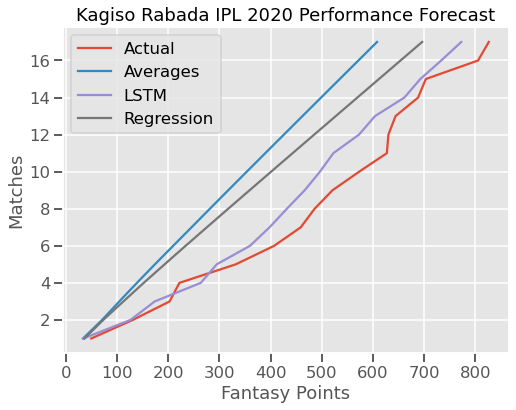

In [41]:
pid=192
i=500
reg=ipl2020_reg(pid,1)
avg=ipl2020_avg(pid)
lstm=ipl2020_lstm(pid,i)
actual=ipl2020act(pid)
y=[]
agg =[]
for i in range(1,(len(lstm)+1)):
    y.append(i)
for i in range(0,len(reg)):
    agg.append(0.5*lstm[i]+0.3*reg[i]+0.2*avg[i])
fig = plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.set_context('talk')
sns.color_palette("Paired")
r=sns.color_palette()
ax=sns.lineplot(y=y, x=actual ,palette=r)
ax=sns.lineplot(y=y, x=avg ,palette=r)
ax=sns.lineplot(y=y, x=lstm ,palette=r)
ax=sns.lineplot(y=y, x=reg ,palette=r)
ax.set(xlabel='Fantasy Points', ylabel='Matches',title=squad['name'][(squad.player_id==pid)].iloc[0] + ' IPL 2020 Performance Forecast')
plt.legend(labels=['Actual', 'Averages', 'LSTM', 'Regression'])
#plt.savefig('VK.png')

In [ ]:
pid=599
lstm1, actual=ipl2020_lstm(pid,250)
#lstm2, actual=ipl2020_lstm(pid,500)
lstm3, actual=ipl2020_lstm(pid,750)
lstm4, actual=ipl2020_lstm(pid,1000)
y=[]
for i in range(1,(len(lstm1)+1)):
    y.append(i)
fig = plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.set_context('talk')
sns.color_palette("Paired")
r=sns.color_palette("rocket")
ax=sns.lineplot(y=y, x=lstm1 ,palette=r)
ax=sns.lineplot(y=y, x=lstm ,palette=r)
ax=sns.lineplot(y=y, x=lstm3 ,palette=r)
ax=sns.lineplot(y=y, x=lstm4 ,palette=r)
ax=sns.lineplot(y=y, x=actual ,palette=r)
ax.set(xlabel='Fantasy Points', ylabel='Matches',title=squad['name'][(squad.player_id==pid)].iloc[0] + ' IPL 2020 Prediction Epoch')
plt.legend(labels=['250 Epoch', '500 Epoch', '750 Epoch', '1000 Epoch','Actual Points'])
#plt.savefig('VK.png')

In [34]:
lstm

952.7500000000002

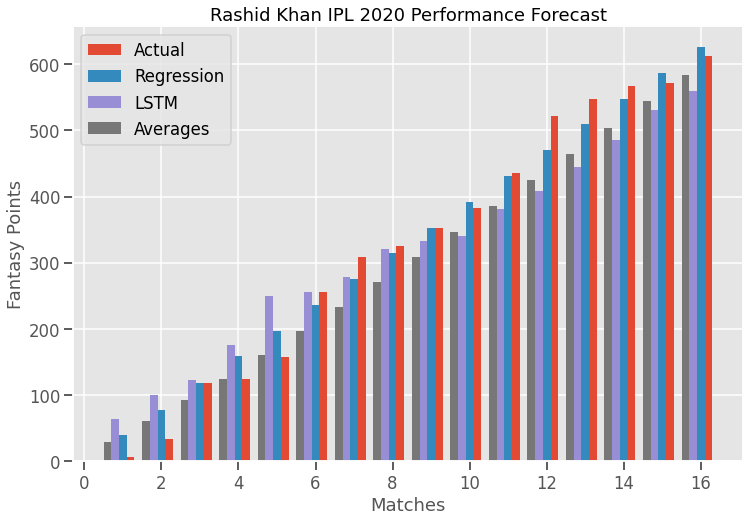

In [149]:
#pid=19
#i=250
#reg=ipl2020_reg(pid,2)
w=0.2
#avg=ipl2020_avg(pid)
#lstm, actual=ipl2020_lstm(pid,i)
y=[]
for i in range(1,(len(lstm)+1)):
    y.append(i)
y=np.array(y)
fig = plt.figure(figsize=(12,8))
plt.style.use('ggplot')
sns.set_context('talk')
sns.color_palette("Paired")
r=sns.color_palette()
plt.bar(y+w,actual,label='Actual',width=w)
plt.bar(y,reg,label='Regression',width=w)
plt.bar(y-w,lstm,label='LSTM',width=w)
plt.bar(y-2*w,avg,label='Averages',width=w)
plt.title('Regression Coefficients for IPL 2020 Players')
plt.xlabel('Matches')
plt.ylabel('Fantasy Points')
plt.title(squad['name'][(squad.player_id==pid)].iloc[0] + ' IPL 2020 Performance Forecast')
plt.legend(labels=['Actual', 'Regression', 'LSTM', 'Averages'])
#plt.savefig('VK.png')

In [47]:
agg =[]
for i in range(0,len(reg)):
    agg.append(0.5*lstm[i]+0.3*reg[i]+0.2*avg[i])
    
    

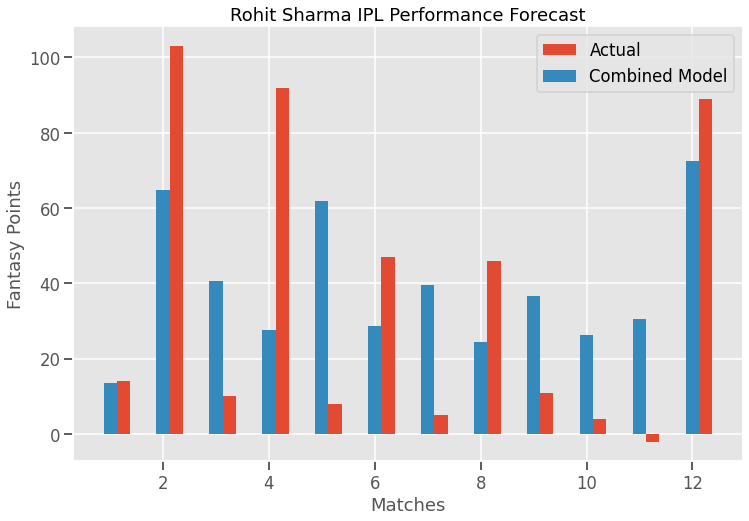

In [51]:
w=0.25
fig = plt.figure(figsize=(12,8))
plt.style.use('ggplot')
sns.set_context('talk')
sns.color_palette("Paired")
r=sns.color_palette()
plt.bar(y+w,actual,label='Actual',width=w)
plt.bar(y,agg,label='Combined Model',width=w)
plt.xlabel('Matches')
plt.ylabel('Fantasy Points')
plt.title(squad['name'][(squad.player_id==pid)].iloc[0] + ' IPL Performance Forecast')
plt.legend(labels=['Actual', 'Combined Model'])

## Predict Performance of Rohit Sharma IPL2020


ADF Statistic: -8.012429510365617
p-value: 2.183254609307769e-12


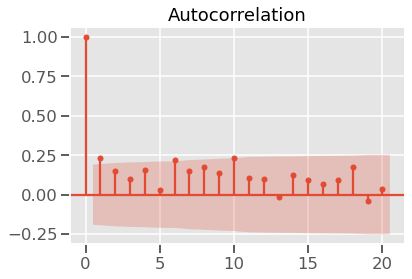

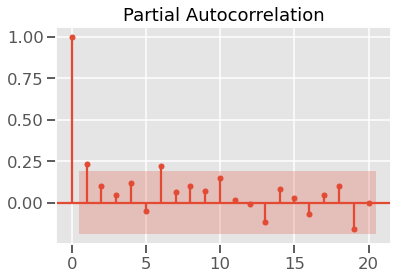

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
match_id=1065
sq=squad[squad.match_id==match_id]
l=[]
pid=30
#sq['Predicted Batting Points']=0
date=match['start_date'][(match['match_id']==match_id)].iloc[0]
mtype=match['matchtype'][(match['match_id']==match_id)].iloc[0]
inning=squad[(squad.start_date<date) & (squad.matchtype==mtype) & (squad.player_id==pid)].sort_values(by=['start_date'])
iplinn=squad[(squad.series_id==232) & (squad.matchtype==mtype) & (squad.player_id==pid)].sort_values(by=['start_date'])
series= get_timeseries_data(len(inning),pid)
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
ad_fuller_result = adfuller(series)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
plot_acf(series, lags=20)
plot_pacf(series, lags=20)
plt.show()

In [35]:
#X = series.values

train, test = get_timeseries_data(len(iplinn),pid), get_timeseries_data(len(inning),pid)
model = AutoReg(train, lags=4)
model_fit = model.fit()

In [25]:
x=[]
for i in range(1,78):
    x.append(i)
    
    
    

In [26]:
sampl = np.random.normal(loc=35.53, scale=4, size=77)

Text(0, 0.5, 'Coefficient Value')

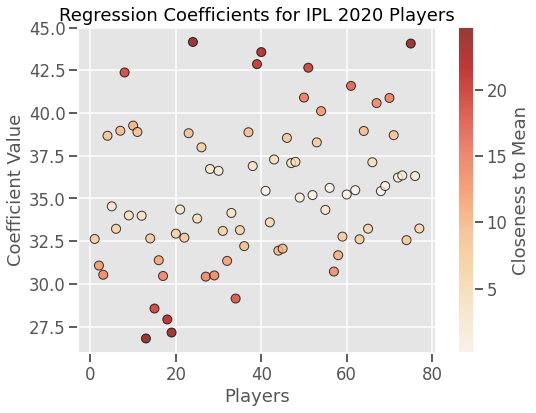

In [27]:
fig = plt.figure(figsize=(8,6))
plt.style.use('ggplot')
sns.set_context('talk')
sns.color_palette("Paired")
c=[]
r=sns.color_palette("rocket")
for i in sampl:
    c.append((abs(35.5333-i)/35.33)*100)
    
    
#ax=sns.scatterplot(y=sampl, x=x ,palette=r)
plt.scatter(x=x, y=sampl, edgecolor='black',c=c,cmap='OrRd', linewidth=1, alpha=0.75)
cbar=plt.colorbar()
cbar.set_label('Closeness to Mean')
plt.title('Regression Coefficients for IPL 2020 Players')
plt.xlabel('Players')
plt.ylabel('Coefficient Value')

In [101]:
(abs(35.5333-i)/35.33)*100

117.36965751485991

In [94]:
csk=list(squad['player_id'][(squad.series_id==232) & (squad.team_id==20)].unique())
mi=list(squad['player_id'][(squad.series_id==232) & (squad.team_id==21)].unique())
dc=list(squad['player_id'][(squad.series_id==232) & (squad.team_id==22)].unique())
srh=list(squad['player_id'][(squad.series_id==232) & (squad.team_id==23)].unique())
kkr=list(squad['player_id'][(squad.series_id==232) & (squad.team_id==24)].unique())
kxip=list(squad['player_id'][(squad.series_id==232) & (squad.team_id==25)].unique())
rcb=list(squad['player_id'][(squad.series_id==232) & (squad.team_id==26)].unique())
rr=list(squad['player_id'][(squad.series_id==232) & (squad.team_id==27)].unique())

In [97]:
ap=[]
for i in csk:
    
    temp=[]
    temp.append(ipl2020act(i))
    temp.append(squad['name'][(squad.player_id==i)].iloc[0])
    ap.append(temp)
ap.sort(reverse=True)
ap[0:5]
        
        
        
    
    

[[557, 'Faf du Plessis'],
 [555, 'Sam Curran'],
 [449, 'Ambati Rayudu'],
 [446, 'Ravindra Jadeja'],
 [382, 'Shane Watson']]

In [98]:
ap

[[557, 'Faf du Plessis'],
 [555, 'Sam Curran'],
 [449, 'Ambati Rayudu'],
 [446, 'Ravindra Jadeja'],
 [382, 'Shane Watson'],
 [331, 'Deepak Chahar'],
 [242, 'Shardul Thakur'],
 [232, 'MS Dhoni'],
 [209, 'Lungi Ngidi'],
 [143, 'Dwayne Bravo'],
 [138, 'Piyush Chawla'],
 [111, 'Karn Sharma'],
 [69, 'Kedar Jadhav'],
 [48, 'Mitchell Santner'],
 [42, 'Imran Tahir'],
 [36, 'Murali Vijay'],
 [33, 'Josh Hazlewood'],
 [1, 'Ruturaj Gaikwad'],
 [1, 'Narayan Jagadeesan'],
 [1, 'Monu Kumar']]

In [35]:
for i in range(0,5):
    print(ap[i][1])

Jofra Archer
Rahul Tewatia
Sanju Samson
Jos Buttler
Ben Stokes


In [44]:
pp=[]
for i in rr:
    match_id=1065
    date=match['start_date'][(match['match_id']==match_id)].iloc[0]
    mtype=match['matchtype'][(match['match_id']==match_id)].iloc[0]
    inning=squad[(squad.start_date<date) & (squad.matchtype==mtype) & (squad.player_id==i)].sort_values(by=['start_date'])
    temp=[]
    if(len(inning)<20):
        temp.append(ipl2020_avg(i))
        temp.append(squad['name'][(squad.player_id==i)].iloc[0])
    elif((len(inning)>=20) & (len(inning)<=40)):
        temp.append(ipl2020_reg(i,1))
        temp.append(squad['name'][(squad.player_id==i)].iloc[0])
    elif((len(inning)>40) & (len(inning)<=65)):
        temp.append(ipl2020_reg(i,2))
        temp.append(squad['name'][(squad.player_id==i)].iloc[0])
    else:
        temp.append(ipl2020_lstm(i,500))
        temp.append(squad['name'][(squad.player_id==i)].iloc[0])
    pp.append(temp)
    pp.sort(reverse=True)
    pp[0:5]
        
        
        
        
        

65.52952689545607
[ 0.         -0.25644437  0.32744325 -0.80524485 -0.77171644  0.0038567
 -0.00315724 -0.00854015  0.00287843 -0.00730238  0.00468918  0.01072833
  0.00757519 -0.00190455  0.00555608]
25.369847009080324
0.4670994409272984
38.35624004782934
-0.5832253378822803
Prediction for 0 Match:  31.45
Actual Points for 0 Match:  6
% error 424.17 %
  
Prediction for 1 Match:  35.53
Actual Points for 1 Match:  51
% error 30.33 %
  
Prediction for 2 Match:  22.14
Actual Points for 2 Match:  17
% error 30.24 %
  
Prediction for 3 Match:  23.57
Actual Points for 3 Match:  22
% error 7.14 %
  
Prediction for 4 Match:  38.82
Actual Points for 4 Match:  36
% error 7.83 %
  
Prediction for 5 Match:  32.86
Actual Points for 5 Match:  143
% error 77.02 %
  
Prediction for 6 Match:  29.48
Actual Points for 6 Match:  110
% error 73.2 %
  
Prediction for 7 Match:  36.04
Actual Points for 7 Match:  22
% error 63.82 %
  
Actual Total:  407
Predicted Total:  249.89
61.46703443657913
[ 0.         -

In [47]:
pp[0:5]

[[765.5200000000001, 'Jos Buttler'],
 [455.55, 'Sanju Samson'],
 [429.61000000000007, 'Steven Smith'],
 [429.42, 'Rahul Tewatia'],
 [426.50000000000006, 'Jofra Archer']]

In [46]:
ap[0:5]

[[668, 'Jofra Archer'],
 [588, 'Rahul Tewatia'],
 [476, 'Sanju Samson'],
 [407, 'Jos Buttler'],
 [407, 'Ben Stokes']]

In [49]:
for i in range(0,5):
    print(pp[i][0])

765.5200000000001
455.55
429.61000000000007
429.42
426.50000000000006


NameError: name 'series_id' is not defined